<a href="https://colab.research.google.com/github/restiso7788/Linear_Regression_CellBox/blob/main/comparsion_lr_cellbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/expert.csv")
#remove the index column
df =df.iloc[:,1:]
df929 = pd.read_csv("/content/random_partition_average_testhat_929.csv")
df929 = df929.iloc[:,1:]

In [3]:
new_df = pd.DataFrame()
for _ in range(1000):
  Y = df.iloc[:,:-12]
  X = df.iloc[:,-12:]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
  lr = LinearRegression().fit(X_train, Y_train)
  y_hat = lr.predict(X_test)
  y_hat = pd.DataFrame(y_hat)
  #df = df.reindex(np.random.permutation(df.index))
  y_hat.index = X_test.index
  new_df = pd.concat([new_df, y_hat],axis = 0)
print(new_df.shape)

df2 = new_df.groupby(new_df.index).mean()
df2.head()

(27000, 87)


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.323906,-0.590645,-0.777881,-0.555652,-0.049839,-0.121549,0.116590,0.029137,0.413304,0.463026,...,-0.100683,0.006228,0.136130,0.067715,0.189429,0.029376,0.458917,-0.001089,0.023733,0.199730
1,-0.440756,-0.501326,-0.996315,-0.488489,-0.190473,0.052967,0.130804,0.046338,0.103096,0.576044,...,-0.123482,0.012981,0.204101,-0.053930,0.051022,-0.028715,0.362782,1.490076,-0.124960,0.290407
2,-0.451535,-0.622857,-0.877567,-0.621880,-0.175360,-0.069148,0.025664,0.021471,0.244685,0.412359,...,-0.064980,0.001328,0.077339,0.042242,0.237944,0.221067,0.384353,0.153181,0.078877,0.264344
3,-0.288202,-0.650488,-0.927606,-0.563611,-0.064531,-0.114565,0.068678,0.125050,0.234311,0.433489,...,-0.068969,-0.017909,0.092764,0.055316,0.186277,0.203879,0.425155,0.058096,0.046382,0.470265
4,-0.373442,-0.869423,-1.349670,-1.110069,-0.112624,-0.221264,0.314691,0.296922,0.424882,0.576439,...,-0.037763,0.006266,0.196173,0.075003,0.290820,-0.156175,0.691829,-0.024050,-0.006595,0.639985


In [4]:
x = df.iloc[:,-12:]

In [5]:
df2 = pd.concat([df2,x],axis = 1, join = "inner")
df2.shape

(89, 99)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Correlation between linear regression and CellBox across all conditions')

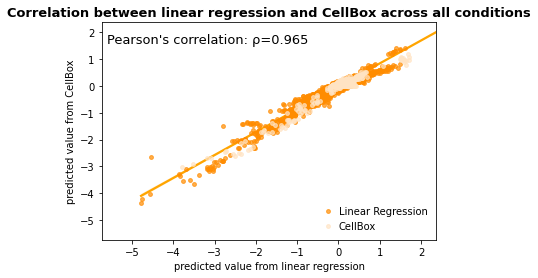

In [6]:
x_all = df2.values.flatten()
y_all = df929.values.flatten()

x_prot = df2.iloc[:,0:82]
y_prot = df929.iloc[:,0:82]
x_pheno = df2.iloc[:,82:87]
y_pheno = df929.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)

plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="bisque",zorder=4)

plt.legend(["Linear Regression","CellBox"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')

sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'orange', 'alpha': 1})


plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))


lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*0.9])
plt.ylim([lower*1.2, upper*0.9])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 13)
plt.xlabel('predicted value from linear regression')
plt.ylabel('predicted value from CellBox')
plt.title("Correlation between linear regression and CellBox across all conditions", 
          weight='bold', size=13)
